In [2]:
# load the saved parameters and do visualization for W, a and C_alpha.
import numpy as np
import matplotlib.pyplot as plt


colors = plt.get_cmap('Set2').colors



path = f'/data3/wangshaobo/ICL/RPE/results_paper/NGram/Full_parent2_n10000_L100_S3_H3_lr1.0_optsgd_w+10.0_w-0.01_D2_alpha0.1_n-epochs5000.npz'
data = np.load(path)

# extract info from path, about L, S, H
path = path.split('/')[-1]
path = path.split('_')

L = int(path[3][1:])
S = int(path[4][1:])
H = int(path[5][1:])
D = path[10][1:]
print('L, S, H, D', L, S, H, D)



L, S, H, D 100 3 3 2


In [3]:
# check the dict of data saved with npz
print(data.files)
alphas = data['alphas']
alphas = [alpha[1:] for alpha in alphas]

['W_before', 'C_list', 'a_list', 'W_after', 'train_loss_list', 'val_loss_list', 'alphas']


(5001, 7)


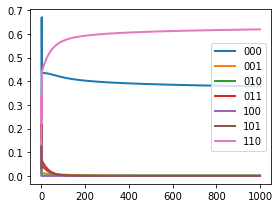

In [10]:
# plot C_list curve, C_list is a list of multiple C_alpha, draw the curve of each alpha.
# each alpha is corrensding to a binary coding of H+1 positions, change alpha to binary, then to a list of 0 and 1.
C_list = data['C_list']
# plot the ratio of each C_alpha **2 over the some of all C_alpha**2
C_list_squre = C_list**2
C_list_squre = C_list_squre / np.sum(C_list_squre, axis = 1)[:,np.newaxis]
print(C_list_squre.shape)
keep = 500
plt.figure(figsize=(4,3))
for i in range(len(alphas)):
    plt.plot(C_list_squre[:keep,i], label = alphas[i], linewidth=2)
    plt.legend()
# plt.xlabel('epoch')
# plt.xscale('log')
# plt.ylabel(r'$c_\mathcal{S}$')
plt.tight_layout()
plt.savefig(f'figures/full{D}_C_alpha.svg')


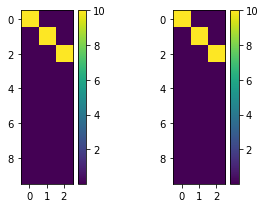

In [5]:
# draw W_before and W_after heatmap


W_before = data['W_before'][:10,:10]
W_after = data['W_after'][:10,:10]
# Get the min and max values for normalization
vmin = min(W_before.min(), W_after.min())
vmax = max(W_before.max(), W_after.max())

# Create the figure and subplots
plt.figure(figsize=(4, 3))

# Plot W_before
plt.subplot(1, 2, 1)
plt.imshow(W_before, aspect='equal', vmin=vmin, vmax=vmax)
plt.xticks([0,1,2])
plt.colorbar()

# Plot W_after
plt.subplot(1, 2, 2)
plt.imshow(W_after, aspect='equal', vmin=vmin, vmax=vmax)
plt.xticks([0,1,2])
plt.colorbar()
plt.tight_layout()
# make two subplot near
plt.subplots_adjust(wspace=0.5)
plt.savefig(f'figures/full{D}_W_before_after.svg')


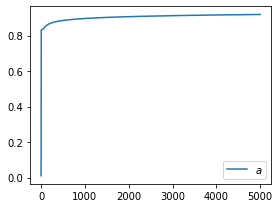

In [6]:
# plot a_list curve
a_list = data['a_list']
plt.figure(figsize=(4,3))
plt.plot(a_list,label=r'$a$')
plt.legend()
# plt.xlabel('epoch')
plt.tight_layout()
plt.savefig(f'figures/full{D}_a.svg')
